In [2]:
import pandas as pd
from IPython.display import display, HTML
%load_ext autoreload
%autoreload 2

import importlib

In [3]:
csv_file = open("uaScoresDataFrame.csv")
scores = pd.read_csv(csv_file)
scores = scores.drop('id', axis=1)
scores = scores.drop('Venture Capital', axis=1)

In [4]:
def check_zero(dataset):
    invalid_rows = []
    for element in dataset.columns.tolist():
        invalid = dataset[dataset[element] == 0.0]
        invalid_rows.append(invalid[['UA_Name','UA_Country']])
    df = pd.concat(invalid_rows).reset_index(drop=True).value_counts()
    return df
results = check_zero(scores).to_frame().reset_index().rename(columns={0:"number"})
print(results)

                       UA_Name               UA_Country  number
0                      Andorra                  Andorra       6
1                    Gibraltar                Gibraltar       5
2                      Managua                Nicaragua       3
3                     Tashkent               Uzbekistan       3
4                  Belize City                   Belize       3
5                       Panama                   Panama       3
6                    Palo Alto               California       2
7                       La Paz                  Bolivia       2
8                     Portland                    Maine       2
9                       Havana                     Cuba       2
10                     Fukuoka                    Japan       2
11                    San Juan              Puerto Rico       2
12                     Bozeman                  Montana       2
13                   Baltimore                 Maryland       2
14                    Valletta          

In [5]:
scores = scores[(scores != 0).all(1)]

In [6]:
weights_data = {
    'Housing' : 1.5,
    'Cost of Living' : 1.5,
    'Startups' : 0.5,
    'Business Freedom' : 0.8,
    'Safety' : 1.5,
    'Healthcare' : 1.5,
    'Education' : 0.5,
    'Travel Connectivity' : 1.5,
}

weights_vector = pd.Series(0.0, index=scores.columns[3:-1])
for i in range(len(weights_vector)):
    row_name = weights_vector.index[i]
    weights_vector[i] = weights_data.get(row_name, 1)

In [7]:
summable_values = list(scores)
if 'Naive Sum' in summable_values:
    summable_values.remove('Naive Sum')
weighted_scores = scores.copy()
weighted_scores = weighted_scores * weights_vector
scores['Naive Sum'] = weighted_scores[summable_values].sum(numeric_only=True, axis=1)

In [8]:
# scores['Naive Sum']
# better, worse

midpoint = scores['Naive Sum'].quantile()
scores['Label'] = ''
scores.loc[scores['Naive Sum'] < midpoint, 'Label'] = 'worse'
scores.loc[scores['Naive Sum'] >= midpoint, 'Label'] = 'better'

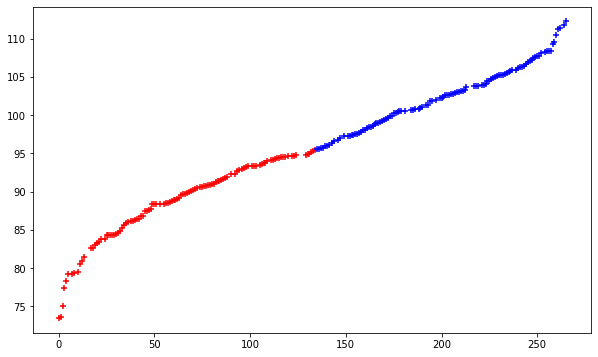

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
vals = scores['Naive Sum'].sort_values()
colors = np.where(vals >= midpoint, 'b', 'r')
ax.scatter(scores.index, vals, c=colors, marker='+')

In [36]:
from Modules.dataprocessing import ProcessingData

a, b = ProcessingData.prepare_data(scores)

preview_table = pd.concat([a.head(), b.head()])
display(preview_table)

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Travel Connectivity,Commute,Business Freedom,Safety,...,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Naive Sum,Label
0,Barcelona,Spain,Europe,0.591444,0.563778,0.750944,0.549855,0.826477,0.601007,0.700514,...,0.491695,0.288896,0.372235,0.287847,0.627352,0.843500,0.723890,0.716803,0.766476,better
1,Geneva,Switzerland,Europe,0.008611,0.000000,0.410222,0.556349,0.877687,0.845962,0.818287,...,0.508740,0.857048,0.650256,0.583450,0.846547,0.471556,0.863833,0.814409,0.622112,better
2,Sao Paulo,Brazil,South America,0.812889,0.758111,0.624722,0.169851,0.609458,0.000000,0.456536,...,0.065574,0.172417,0.112330,0.166375,0.274151,0.865500,0.653736,0.884905,0.190799,worse
3,Louisville,Kentucky,North America,0.695333,0.595333,0.361556,0.084791,0.195060,0.815902,0.262693,...,0.339214,0.626795,0.645634,0.307441,0.519390,0.521500,0.517691,0.107628,0.279379,worse
4,Innsbruck,Austria,Europe,0.634222,0.414667,0.125056,0.524471,0.940234,0.666990,0.800497,...,0.415807,0.714816,0.417463,0.144623,0.465753,0.380500,0.847391,0.465963,0.634883,better
188,Tokyo,Japan,Asia,0.517444,0.270111,0.588556,0.801599,0.878446,0.775269,1.000000,...,0.703561,0.552499,0.301682,0.537322,0.439995,0.926889,0.690153,0.810238,0.955654,better
189,Boulder,Colorado,North America,0.300444,0.392333,0.539222,0.378233,0.900447,0.815902,0.661930,...,0.453697,1.000000,0.645634,0.340564,0.605553,0.173889,0.943487,0.833984,0.606964,better
190,Orlando,Florida,North America,0.530944,0.476000,0.621944,0.331705,0.597109,0.815902,0.322359,...,0.339214,0.635398,0.645634,0.390250,0.445847,0.547722,0.518361,0.537199,0.383693,worse
192,Belgrade,Serbia,Europe,0.917500,0.838444,0.434389,0.156005,0.806078,0.360576,0.618726,...,0.000000,0.429056,0.044673,0.319629,0.328476,0.610778,0.713598,0.615902,0.426124,worse
193,Stuttgart,Germany,Europe,0.590444,0.519222,0.306278,0.566867,0.911827,0.871497,0.800092,...,0.494029,0.698587,0.505022,0.288955,0.473153,0.506222,0.731441,0.464079,0.779239,better


In [39]:
import Modules.fuzzysys as fsys
from Modules.membership_functions import TriangularFunction
importlib.reload(fsys)

fuzzy = fsys.FuzzySystem()
fuzzy.add_antecedent('Housing', 'Bad', TriangularFunction(0, 0, 0.4))
fuzzy.add_antecedent('Housing', 'Mid', TriangularFunction(0.3, 0.4, 0.8))
fuzzy.add_antecedent('Housing', 'Good', TriangularFunction(0.7, 1, 1))

fuzzy.add_antecedent('Startups', 'Bad', TriangularFunction(0, 0, 0.3))
fuzzy.add_antecedent('Startups', 'Mid', TriangularFunction(0.2, 0.4, 0.6))
fuzzy.add_antecedent('Startups', 'Good', TriangularFunction(0.5, 0.8, 1))

fuzzy.add_rule({'Housing' : 'Bad', 'Startups': 'Bad', 'Rating': 'Bad'})
fuzzy.add_rule({'Housing' : 'Bad', 'Startups': 'Mid', 'Rating': 'Bad'})
fuzzy.add_rule({'Housing' : 'Bad', 'Startups': 'Good', 'Rating': 'Bad'})
fuzzy.add_rule({'Housing' : 'Mid', 'Startups': 'Bad', 'Rating': 'Bad'})
fuzzy.add_rule({'Housing' : 'Mid', 'Startups': 'Mid', 'Rating': 'Bad'})
fuzzy.add_rule({'Housing' : 'Mid', 'Startups': 'Good', 'Rating': 'Good'})
fuzzy.add_rule({'Housing' : 'Good', 'Startups': 'Bad', 'Rating': 'Good'})
fuzzy.add_rule({'Housing' : 'Good', 'Startups': 'Mid', 'Rating': 'Good'})
fuzzy.add_rule({'Housing' : 'Good', 'Startups': 'Good', 'Rating': 'Good'})

fuzzy.add_consequent('Rating', 'Bad', TriangularFunction(0, 0, 0.5))
fuzzy.add_consequent('Rating', 'Good', TriangularFunction(0.5, 1, 1))

for i in range(5):
    sample = a.iloc[i]
    result = fuzzy.compute(sample, 'fom')
    print(f'{sample["UA_Name"]} -> {result}')

fuzzified_sample={'Housing': {'linguistic': 'Mid', 'numerical': 0.521388888888889}, 'Startups': {'linguistic': 'Good', 'numerical': 0.836481481481482}}
rule_results=[1, 1, 0.836481481481482, 0.521388888888889, 0.521388888888889, 0.43613215020576174, 1, 1, 0.836481481481482]
Barcelona -> Good
fuzzified_sample={'Housing': {'linguistic': 'Bad', 'numerical': 0.9784722222222222}, 'Startups': {'linguistic': 'Mid', 'numerical': 0.9488888888888888}}
rule_results=[0.9784722222222222, 0.9284614197530863, 0.9784722222222222, 1, 0.9488888888888888, 1, 1, 0.9488888888888888, 1]
Geneva -> Good
fuzzified_sample={'Housing': {'linguistic': 'Good', 'numerical': 0.37629629629629674}, 'Startups': {'linguistic': 'Good', 'numerical': 0.4157407407407409}}
rule_results=[1, 1, 0.4157407407407409, 1, 1, 0.4157407407407409, 0.37629629629629674, 0.37629629629629674, 0.15644170096021973]
Sao Paulo -> Good
fuzzified_sample={'Housing': {'linguistic': 'Mid', 'numerical': 0.2616666666666667}, 'Startups': {'linguistic'

In [19]:
import Modules.fuzzysys as fsys
from Modules.membership_functions import TrapezoidalFunction
importlib.reload(fsys)

fuzzy = fsys.FuzzySystem()
fuzzy.add_antecedent('Housing', 'Bad', TrapezoidalFunction(0, 0.2, 0.4, 0.6))
fuzzy.add_antecedent('Housing', 'Mid', TrapezoidalFunction(0.1, 0.3, 0.5, 0.7))
fuzzy.add_antecedent('Housing', 'Good', TrapezoidalFunction(0.3, 0.5, 0.7, 1))

fuzzy.add_antecedent('Startups', 'Bad', TrapezoidalFunction(0, 0.3, 0.6, 0.9))
fuzzy.add_antecedent('Startups', 'Mid', TrapezoidalFunction(0.1, 0.4, 0.7, 1))
fuzzy.add_antecedent('Startups', 'Good', TrapezoidalFunction(0.05, 0.25, 0.45, 0.65))

for i in range(5):
    sample = a.iloc[i].to_dict()
    fuzzified_sample = fuzzy.fuzzify(sample)
    print(f'{sample["UA_Name"]} -> {fuzzified_sample}')

Indianapolis -> {'Housing': {'linguistic': 'Good', 'numerical': 1}, 'Startups': {'linguistic': 'Bad', 'numerical': 1}}
Salt Lake City -> {'Housing': {'linguistic': 'Good', 'numerical': 1}, 'Startups': {'linguistic': 'Bad', 'numerical': 1}}
San Francisco Bay Area -> {'Housing': {'linguistic': 'Bad', 'numerical': 0}, 'Startups': {'linguistic': 'Bad', 'numerical': 0}}
Winnipeg -> {'Housing': {'linguistic': 'Good', 'numerical': 0.9064814814814809}, 'Startups': {'linguistic': 'Bad', 'numerical': 1}}
Innsbruck -> {'Housing': {'linguistic': 'Good', 'numerical': 1}, 'Startups': {'linguistic': 'Bad', 'numerical': 0.416851851851852}}


In [ ]:
import Modules.fuzzysys as fsys
from Modules.membership_functions import TrapezoidalFunction
importlib.reload(fsys)

fuzzy = fsys.FuzzySystem()
fuzzy.add_antecedent('Housing', 'Bad', TrapezoidalFunction(0, 0.2, 0.4, 0.6))
fuzzy.add_antecedent('Housing', 'Mid', TrapezoidalFunction(0.1, 0.3, 0.5, 0.7))
fuzzy.add_antecedent('Housing', 'Good', TrapezoidalFunction(0.3, 0.5, 0.7, 1))

fuzzy.add_antecedent('Startups', 'Bad', TrapezoidalFunction(0, 0.3, 0.6, 0.9))
fuzzy.add_antecedent('Startups', 'Mid', TrapezoidalFunction(0.1, 0.4, 0.7, 1))
fuzzy.add_antecedent('Startups', 'Good', TrapezoidalFunction(0.05, 0.25, 0.45, 0.65))

for i in range(5):
    sample = a.iloc[i].to_dict()
    fuzzified_sample = fuzzy.fuzzify(sample)
    print(f'{sample["UA_Name"]} -> {fuzzified_sample}')